In [1]:
import sys
import scanpy as sc
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mp
import cell2location as cl

mp.rcParams['pdf.fonttype'] = 42

Global seed set to 0
/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [53]:
outdir = 'immune'
outdir_ref_sig = f'{outdir}/ref_signatures'
outdir_map = f'{outdir}/cell2location_map'

In [3]:
adata_ref = sc.read('../../scrna-seq/sce/immune_filtered.h5ad')
adata_ref

/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18191 × 32283
    obs: 'Sample', 'Barcode', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'total', 'label', 'sizeFactor', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'label.ref.pred', 'label1', 'label.t.cell', 'label.mp.cell', 'label.neut.cell', 'label2'
    var: 'ID', 'Symbol', 'Type'
    uns: 'Samples', 'X_name'
    obsm: 'PCA', 'PCAsub', 'TSNE', 'TSNEsub', 'UMAP', 'UMAPsub'
    layers: 'logcounts'

In [120]:
adata_ref.var

,ID,Symbol,Type,n_cells,nonz_mean
Sox17,ENSMUSG00000025902,Sox17,Gene Expression,7,3.428571
Mrpl15,ENSMUSG00000033845,Mrpl15,Gene Expression,2378,1.452061
Lypla1,ENSMUSG00000025903,Lypla1,Gene Expression,2844,1.389944
Tcea1,ENSMUSG00000033813,Tcea1,Gene Expression,3787,1.538685
Atp6v1h,ENSMUSG00000033793,Atp6v1h,Gene Expression,2160,1.295833
...,...,...,...,...,...
Csprs,ENSMUSG00000062783,Csprs,Gene Expression,65,1.015385
Vamp7,ENSMUSG00000051412,Vamp7,Gene Expression,726,1.231405
Tmlhe,ENSMUSG00000079834,Tmlhe,Gene Expression,109,1.137615
CAAA01147332.1,ENSMUSG00000095742,CAAA01147332.1,Gene Expression,501,1.149701


In [42]:
dup_genes = adata_ref.var.index.duplicated()
idx = np.where(~dup_genes)[0]
adata_ref = adata_ref[:, idx].copy()

/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


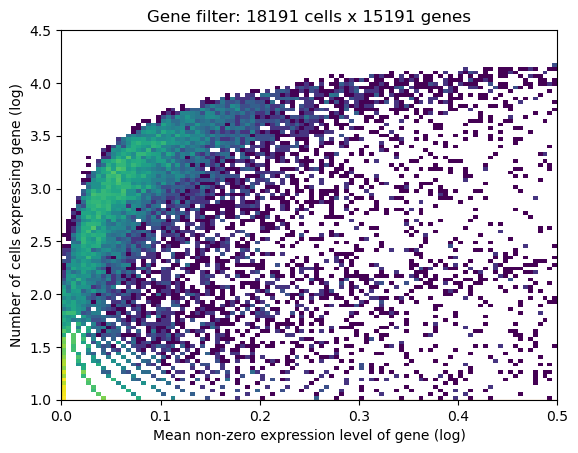

In [45]:
idx = cl.utils.filtering.filter_genes(adata_ref,
    cell_count_cutoff = 5,
    cell_percentage_cutoff2 = 0.03,
    nonz_mean_cutoff = 1
)

adata_ref = adata_ref[:, idx].copy()

In [47]:
adata_ref.obs

,Sample,Barcode,sum,detected,subsets_mito_sum,subsets_mito_detected,subsets_mito_percent,total,label,sizeFactor,...,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,label.ref.pred,label1,label.t.cell,label.mp.cell,label.neut.cell,label2
cell1,Prom1-DTA-IMM,AAACCTGAGCCACTAT-1,839.0,541,1.0,1,0.119190,839.0,1,0.196899,...,singlet,0.000022,0.061579,0.020485,Granulocytes,Neat1+ neutrophil,non-T cell,non-macrophage,non-neutrophil,Neat1+ neutrophil
cell2,Prom1-DTA-IMM,AAACCTGAGCGATTCT-1,2908.0,964,15.0,7,0.515818,2908.0,2,0.682457,...,singlet,0.091254,0.401501,0.087064,Granulocytes,neutrophil,non-T cell,non-macrophage,Gngt2- Cxcl2+ neutrophil,Gngt2- Cxcl2+ neutrophil
cell3,Prom1-DTA-IMM,AAACCTGAGCTATGCT-1,6372.0,2028,153.0,12,2.401130,6372.0,3,1.495396,...,singlet,0.000262,0.006023,0.021830,T cells,NK / T cell,Lef1+ Cd4+ T cell,non-macrophage,non-neutrophil,Lef1+ Cd4+ T cell
cell4,Prom1-DTA-IMM,AAACCTGAGCTTCGCG-1,3782.0,1498,81.0,10,2.141724,3782.0,5,0.887569,...,singlet,0.000227,0.092646,0.010907,B cells,B cell,non-T cell,non-macrophage,non-neutrophil,B cell
cell5,Prom1-DTA-IMM,AAACCTGAGGCATGGT-1,1821.0,904,4.0,3,0.219660,1821.0,1,0.427357,...,singlet,0.000095,0.072428,0.024266,Granulocytes,Neat1+ neutrophil,non-T cell,non-macrophage,non-neutrophil,Neat1+ neutrophil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell22060,Prom1-WT-IMM,TTTGTCATCCAAATGC-2,2603.0,1292,1.0,1,0.038417,2603.0,7,0.610878,...,singlet,0.023799,0.328335,0.084688,Granulocytes,neutrophil,non-T cell,non-macrophage,Gngt2+ Cxcl2+ neutrophil,Gngt2+ Cxcl2+ neutrophil
cell22061,Prom1-WT-IMM,TTTGTCATCCGTCAAA-2,1062.0,739,0.0,0,0.000000,1062.0,7,0.249233,...,singlet,0.000057,0.051603,0.053519,Granulocytes,neutrophil,non-T cell,non-macrophage,Gngt2+ Cxcl2+ neutrophil,Gngt2+ Cxcl2+ neutrophil
cell22062,Prom1-WT-IMM,TTTGTCATCCTAGTGA-2,1201.0,756,9.0,6,0.749376,1201.0,1,0.281854,...,singlet,0.000076,0.021920,0.019803,Granulocytes,Neat1+ neutrophil,non-T cell,non-macrophage,non-neutrophil,Neat1+ neutrophil
cell22063,Prom1-WT-IMM,TTTGTCATCGTTGACA-2,1734.0,872,2.0,1,0.115340,1734.0,8,0.406939,...,singlet,0.000184,0.090596,0.031976,Granulocytes,neutrophil,non-T cell,non-macrophage,Gngt2+ Cxcl2+ neutrophil,Gngt2+ Cxcl2+ neutrophil


In [66]:
adata_ref.X

<18191x15191 sparse matrix of type '<class 'numpy.float64'>'
	with 23998348 stored elements in Compressed Sparse Column format>

In [48]:
cl.models.RegressionModel.setup_anndata(
    adata_ref,
    batch_key = 'Sample',
    labels_key = 'label2',
)

/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(


In [50]:
mod = cl.models.RegressionModel(adata_ref)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.19.0.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'Sample',
│   'labels_key': 'label2',
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   2   │
│         n_cells          │ 18191 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │  17   │
│          n_vars          │ 15191 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                    batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃  Categories   ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Sample'] │ Prom1-DTA-IMM │          0          │
│                     │ Prom1-WT-IMM  │          1          │
└─────────────────────┴───────────────┴─────────────────────┘

                         labels State Registry                          
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃        Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['label2'] │         B1 cell          │          0          │
│                     │          B cell          │          1          │
│                     │    Capg+ Cd4+ T cell     │          2          │
│                     │  Cd74+ C1q+ macrophage   │          3          │
│                     │ Gngt2+ Cxcl2+ neutrophil │          4          │
│                     │ Gngt2+ Cxcl2- neutrophil │          5          │
│                     │ Gngt2- Cxcl2+ neutrophil │          6          │
│                     │    Gzmk+ Cd8+ T cell     │          7          │
│                     │       Il4+ NK cell       │          8          │
│                     │    Klra5+ Cd8+ T cell    │          9          │
│                     │    Lef1+ Cd4+ T cell     │         10          │
│                     │    Lef1+ Cd8+ T cell     │         11          │
│                     │  Mpeg1-high macrophage   │         12          │
│                     │      Ncr1+ NK cell       │         13          │
│                     │    Neat1+ neutrophil     │         14          │
│                     │  S100a6-high macrophage  │         15          │
│                     │        hepatocyte        │         16          │
└─────────────────────┴──────────────────────────┴─────────────────────┘

In [51]:
mod.train(max_epochs=1000, use_gpu=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:105: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 1000/1000: 100%|██████████| 1000/1000 [39:06<00:00,  2.30s/it, v_num=1, elbo_train=7.69e+7]

`Trainer.fit` stopped: `max_epochs=1000` reached.


Epoch 1000/1000: 100%|██████████| 1000/1000 [39:06<00:00,  2.35s/it, v_num=1, elbo_train=7.69e+7]


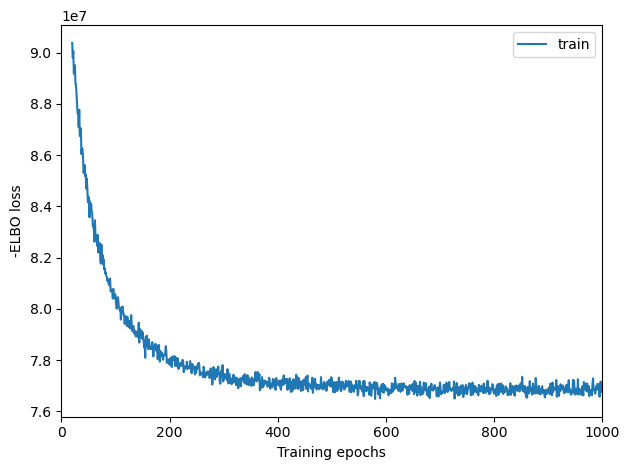

In [52]:
mod.plot_history(20)

In [58]:
adata_ref = mod.export_posterior(
    adata_ref,
    sample_kwargs = {'num_samples': 1000, 'batch_size': 2500, 'use_gpu': True}
)

mod.save(outdir_ref_sig, overwrite=True)
adata_ref.write(f'{outdir_ref_sig}/ref.h5ad')

Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 74.16it/s]


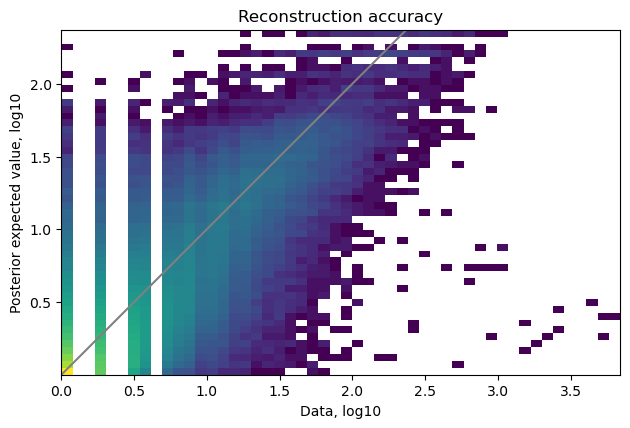

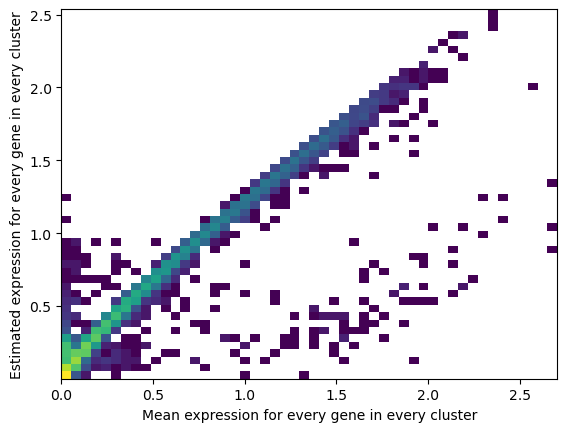

In [55]:
pl.axline((0, 0), slope=1, color='grey')
mod.plot_QC()

In [68]:
adata_ref.uns['mod']

{'model_name': 'RegressionBaseModule',
 'date': '2023-04-27',
 'factor_filter': [],
 'factor_names': ['B1 cell',
  'B cell',
  'Capg+ Cd4+ T cell',
  'Cd74+ C1q+ macrophage',
  'Gngt2+ Cxcl2+ neutrophil',
  'Gngt2+ Cxcl2- neutrophil',
  'Gngt2- Cxcl2+ neutrophil',
  'Gzmk+ Cd8+ T cell',
  'Il4+ NK cell',
  'Klra5+ Cd8+ T cell',
  'Lef1+ Cd4+ T cell',
  'Lef1+ Cd8+ T cell',
  'Mpeg1-high macrophage',
  'Ncr1+ NK cell',
  'Neat1+ neutrophil',
  'S100a6-high macrophage',
  'hepatocyte'],
 'var_names': ['Sox17',
  'Mrpl15',
  'Lypla1',
  'Tcea1',
  'Atp6v1h',
  'Rb1cc1',
  '4732440D04Rik',
  'Pcmtd1',
  'Gm26901',
  'Rrs1',
  'Adhfe1',
  '2610203C22Rik',
  'Mybl1',
  'Vcpip1',
  '1700034P13Rik',
  'Sgk3',
  'Mcmdc2',
  'Snhg6',
  'Tcf24',
  'Ppp1r42',
  'Cops5',
  'Cspp1',
  'Arfgef1',
  'Prex2',
  'Ncoa2',
  'Tram1',
  'Lactb2',
  'Xkr9',
  'Eya1',
  'Terf1',
  'Sbspon',
  'Rpl7',
  'Rdh10',
  'Stau2',
  'Ube2w',
  'Eloc',
  'Tmem70',
  'Ly96',
  'Pkhd1',
  'Il17a',
  'Il17f',
  'Mcm3',
 

In [76]:
ref_sigs = adata_ref.varm['means_per_cluster_mu_fg'][
    [
        f'means_per_cluster_mu_fg_{i}'
        for i in adata_ref.uns['mod']['factor_names']
    ]
].copy()

ref_sigs.columns = adata_ref.uns['mod']['factor_names']
ref_sigs

,B1 cell,B cell,Capg+ Cd4+ T cell,Cd74+ C1q+ macrophage,Gngt2+ Cxcl2+ neutrophil,Gngt2+ Cxcl2- neutrophil,Gngt2- Cxcl2+ neutrophil,Gzmk+ Cd8+ T cell,Il4+ NK cell,Klra5+ Cd8+ T cell,Lef1+ Cd4+ T cell,Lef1+ Cd8+ T cell,Mpeg1-high macrophage,Ncr1+ NK cell,Neat1+ neutrophil,S100a6-high macrophage,hepatocyte
Sox17,0.706860,0.224642,0.613401,0.461260,0.003654,0.410054,0.012370,0.649619,0.930056,0.784503,0.691192,0.541870,0.809497,0.780600,0.609758,0.418852,0.555149
Mrpl15,2.291004,0.365417,0.751163,1.380623,0.164956,0.182593,0.018278,1.025718,1.425014,0.978698,0.312732,0.879215,0.191539,0.848226,0.031811,0.932980,2.754778
Lypla1,1.810462,0.226442,0.644529,1.090578,0.229708,0.211702,0.114810,0.816149,0.846467,0.514689,0.315677,0.461992,0.511312,0.617473,0.061588,1.036482,3.866787
Tcea1,3.098977,0.792938,1.700265,2.481888,0.263390,0.277098,0.070636,2.225531,2.019471,1.314945,0.899175,1.421089,0.690876,1.309078,0.101837,1.778528,1.671345
Atp6v1h,1.369116,0.277062,0.673382,1.416617,0.129533,0.156564,0.049091,0.774838,0.785025,0.539486,0.370111,0.446737,0.603342,0.510315,0.068771,1.076027,1.259308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Csprs,0.077430,0.010531,0.022269,0.021014,0.001775,0.003734,0.005632,0.035891,0.015988,0.016267,0.013927,0.005639,0.028312,0.006853,0.006789,0.005553,0.005456
Vamp7,1.050214,0.047389,0.258990,0.443350,0.010204,0.013162,0.011397,0.248772,0.414326,0.187204,0.100249,0.175576,0.163439,0.247664,0.006797,0.416712,0.780505
Tmlhe,0.013793,0.005772,0.095077,0.028963,0.000765,0.001059,0.000609,0.030261,0.125050,0.030061,0.093023,0.079990,0.023549,0.041985,0.002535,0.009398,0.285420
CAAA01147332.1,0.641853,0.026919,0.181682,0.380717,0.011675,0.006292,0.024163,0.258204,0.192644,0.114017,0.023434,0.063831,0.081062,0.185647,0.004051,0.272797,0.055382


In [98]:
import re
nonribo = [
    x for x in ref_sigs.index
    if re.search(r'^Rps|l', x) is None
]
len(nonribo)

12713

In [105]:
ref_sigs_sub = ref_sigs.loc[nonribo, ~ref_sigs.columns.isin(['hepatocyte', 'B1 cell'])]
ref_sigs_sub.shape
stds = ref_sigs_sub.apply(np.std, axis = 1)
hvgs = stds.sort_values(ascending = False)[1:100].index
hvgs

Index(['Lyz2', 'Cd74', 'Tmsb4x', 'S100a8', 'Actb', 'Apoe', 'Eef1a1', 'Tmsb10',
       'Psap', 'Fth1', 'Uba52', 'H2-Aa', 'Fau', 'Tpt1', 'H2-Ab1', 'H2-Eb1',
       'Cst3', 'Tyrobp', 'mt-Co1', 'Gpx1', 'Ifitm3', 'Actg1', 'Pfn1', 'Ppia',
       'Fcer1g', 'Ctsb', 'Gm10076', 'Fos', 'Gapdh', 'H2-K1', 'Hspa8', 'Ctss',
       'Fn1', 'H2-D1', 'Ly6e', 'S100a6', 'Gzma', 'mt-Co3', 'Cebpb', 'mt-Co2',
       'Ptma', 'Srgn', 'Junb', 'B2m', 'Zfp36', 'Nkg7', 'Cd52', 'Hsp90ab1',
       'Dusp1', 'Vim', 'Itm2b', 'Eef2', 'Crip1', 'Rack1', 'Lars2', 'C1qb',
       'mt-Atp8', 'Ubb', 'Coro1a', 'H3f3a', 'S100a11', 'AW112010', 'Cyba',
       'Ifi30', 'G0s2', 'Ahnak', 'H3f3b', 'Ifitm2', 'Gzmb', 'Mpeg1', 'Eef1b2',
       'mt-Cytb', 'Serf2', 'C1qa', 'Cybb', 'Tgfbi', 'Ucp2', 'C1qc', 'Eif1',
       'Laptm5', 'Npc2', 'Arpc1b', 'H2afz', 'Msrb1', 'Naca', 'Ly6c2', 'Oaz1',
       'Wfdc17', 'Ccr2', 'Lcn2', 'Rac2', 'F13a1', 'Ctsc', 'Hp', 'Lamp1',
       'Prdx5', 'S100a4', 'Cox4i1', 'Igkv1-135'],
      dtype='object')

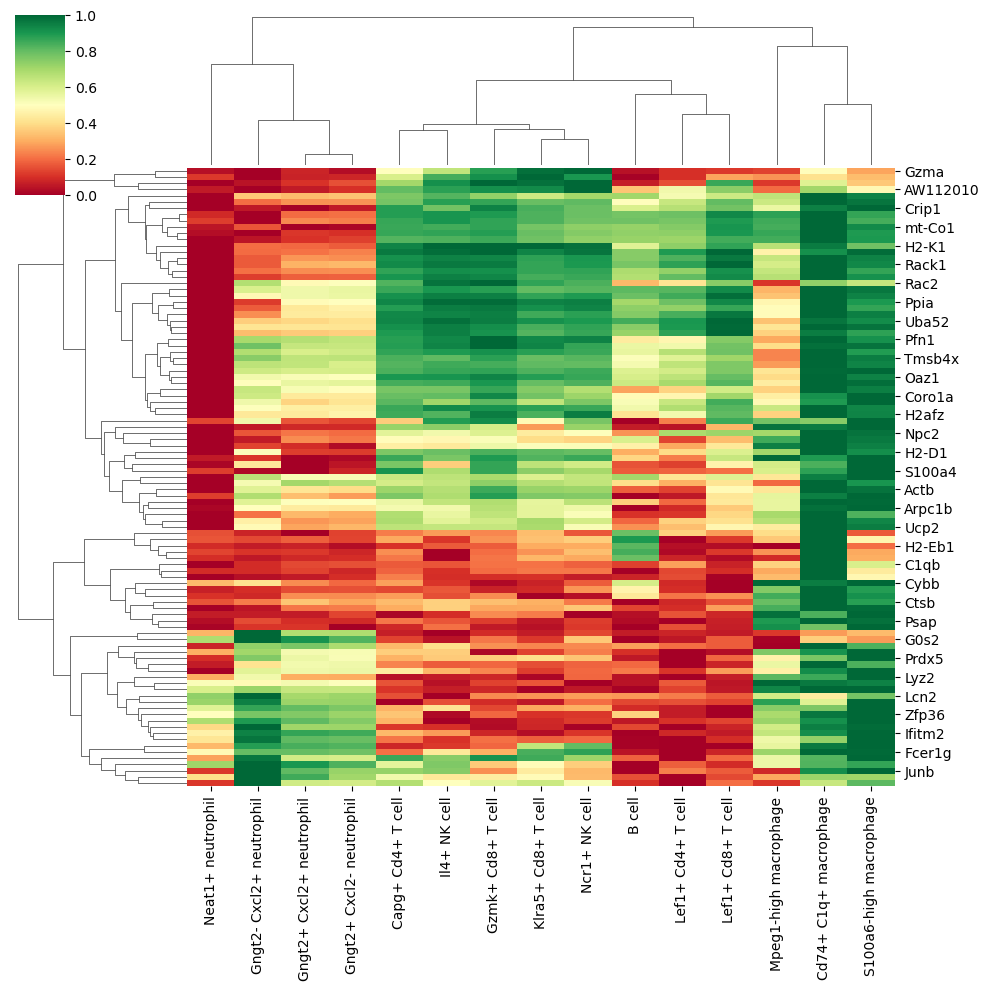

In [115]:
import seaborn as sb

sb.clustermap(
    np.log(ref_sigs_sub.loc[hvgs, :]), cmap='RdYlGn', 
    standard_scale=0
)